# Basic Analysis and Visualization

### Import libraries and data

In [24]:
import csv
import pandas as pd
import numpy as np
#import os
import time

#global variables 
g_len_list = 10 #variable to show no of records in various steps
debug = 0 #for a all (1) OR condensed output (0)

###### INPUTS
path = 'S:/Andreas/FH/Technikum/BA/'  #including slash at the end!
get = '50_Datasets/'
put = '60_Visuals/'

filename = 'df_cs_90864.csv' #'df_cs_90864.csv'
delimiter = ','
###### ######

if debug:
    start_time = time.time()

# 01 import data from csv
print(f'> Fetching data...')
data = csv.DictReader(open(path+get+filename, encoding="ISO8859"), delimiter=delimiter)
df = pd.DataFrame(data)
# Explicitly convert the date column to type DATETIME
df['UTC'] = pd.to_datetime(df['UTC']) #, utc=True)
# All other columns make numbers
for col in df.columns:
    if not 'UTC' in col:
        df[col] = pd.to_numeric(df[col])

# Set date column as index
'''
df = df.set_index(pd.DatetimeIndex(df['UTC']))
df.sort_index(inplace=True)
df = df.asfreq(freq='10min') #when upsampling do a fill with specific value: df.asfreq(freq='30S', method='ffill')
# check the indices
df.index
'''
print(f'> {len(df.index)} lines into DF imported')

# 02 make df smaller
print(f'\n> Deleting unnecessary columns...')
#df.drop(list(df.filter(regex = '_FLAG')), axis = 1, inplace = True) #without copy
print(f'...done')
if debug:
    print(f'> Script finished after running %.2f seconds.' % (time.time() - start_time))

# 03 show data
if debug:
    print(df.tail())
df.info()

> Fetching data...
> 90864 lines into DF imported

> Deleting unnecessary columns...
...done
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90864 entries, 0 to 90863
Data columns (total 40 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   UTC        90864 non-null  datetime64[ns]
 1   BA_T       90864 non-null  float64       
 2   CC_T       90864 non-null  float64       
 3   CR_T       90864 non-null  float64       
 4   DR_T       90864 non-null  float64       
 5   HB_T       90864 non-null  float64       
 6   HF_T       90864 non-null  float64       
 7   KE_T       90864 non-null  float64       
 8   KW_T       90864 non-null  float64       
 9   LA_T       90864 non-null  float64       
 10  LR_T       90864 non-null  float64       
 11  OA_time    90864 non-null  int64         
 12  OA_DD      90864 non-null  float64       
 13  OA_FFAM    90864 non-null  float64       
 14  OA_FFX     90864 non-null  float64       

### (optional) Creating visuals

##### Starting with defining defaults.

['#f77189', '#eb8032', '#c19632', '#a0a131', '#71ac31', '#33b16f', '#35ae97', '#36abb0', '#39a8cc', '#639df4', '#b486f4', '#f35cf4', '#f668be']


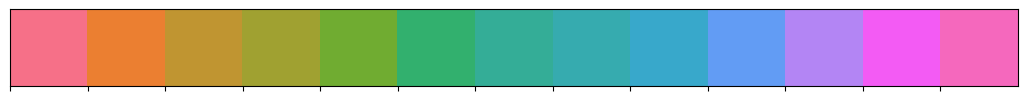

In [25]:
from matplotlib import pyplot as plt
import seaborn as sns

#plt.style.use('default')

#sns.set_palette('viridis')
'''
palette = sns.color_palette() # Default color palette
print(palette)  # Prints the RGB tuples that make up this color palette
sns.palplot(palette) # Plotting your palette!
'''
my = sns.color_palette('husl', 13)
#myh= sns.hls_palette('husl', 11) # Seaborn color palette, with 10 colors
sns.palplot(my) 
print(my.as_hex()[:])

#sns.color_palette("rocket", as_cmap=True) # Get a CMap

#sns.color_palette
#sns.axes_style


#plt.figure(figsize=(12, 6))
# override defaults
plt.rcParams['figure.figsize'] = [12, 6]

### Step 07 
### Basic statistics
##### All rooms
Done once with the total dataset and then with subset2 

In [26]:
# List of dtypes to include
include = ['float'] #['object', 'float', 'int']

df_float = df.select_dtypes(include=include)
df_float = df_float.filter(regex='T')
df_float = df_float.loc[:,~df_float.columns.str.startswith('O')]
#df_float = df_float.drop({'OG_T', 'OA_TL', 'OA_ZEITX'}, axis=1)

# Sort the list of room temperatures via median of all data
if len(df_float.index) < 359580:
    index_sort = df_float.median().sort_values().index
    print(f'> WARNING: wrong sorting possible - not all data is used! <')
    df_sorted = df_float[index_sort]
else:
    index_sort_all = df_float.median().sort_values().index


> WARNING: wrong sorting possible - not all data is used! <


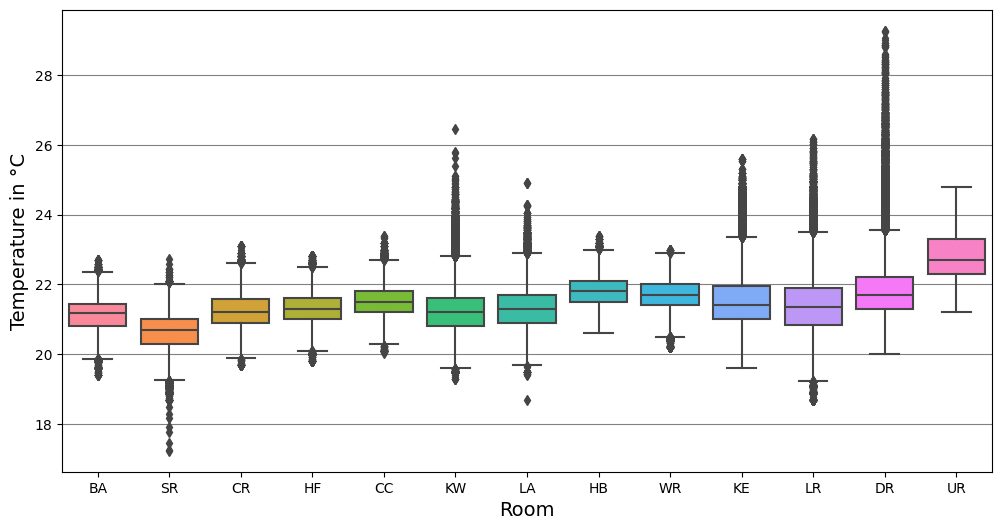

           BA_T      CC_T      CR_T      DR_T      HB_T      HF_T      KE_T  \
count  90864.00  90864.00  90864.00  90864.00  90864.00  90864.00  90864.00   
mean      21.14     21.52     21.24     21.87     21.85     21.30     21.55   
std        0.46      0.47      0.49      0.91      0.44      0.45      0.81   
min       19.40     20.03     19.70     20.00     20.60     19.80     19.60   
25%       20.80     21.20     20.90     21.30     21.50     21.00     21.00   
50%       21.18     21.50     21.20     21.70     21.80     21.30     21.40   
75%       21.43     21.80     21.58     22.20     22.10     21.60     21.95   
max       22.70     23.40     23.10     29.27     23.40     22.80     25.60   

           KW_T      LA_T      LR_T      SR_T      UR_T      WR_T  
count  90864.00  90864.00  90864.00  90864.00  90864.00  90864.00  
mean      21.25     21.32     21.42     20.64     22.83     21.70  
std        0.71      0.58      0.89      0.55      0.69      0.48  
min       19.30 

In [27]:
df_sorted = df_float[index_sort_all]

# prepare names of columns for visualization
df_sorted.columns = df_sorted.columns.str.replace(r'_T', '')

#ax = sns.boxplot(x='attribute', y='temp', data=pd.melt(all_data))
ax = sns.boxplot(x='variable', y='value', hue='variable', data=pd.melt(df_sorted), dodge=False, saturation=1) #(x=all_data.index, y=all_data.columns, data=all_data)
#ax = sns.boxplot(y='VE_Temp', data=all_data)
ax.get_legend().set_visible(False)
ax.yaxis.grid(True, color ="grey")
ax.yaxis.set_ticks(np.arange(18, 29, 2))
ax.set_axisbelow(True)
ax.set_xlabel('Room', fontsize=14)
ax.set_ylabel('Temperature in °C', fontsize=14)
plt.show()

print(df_float.describe().map(lambda x: f"{x:0.2f}"))

##### Specific room per year

Done once with the total dataset and then with subset2 

           DR_T
Yr             
2016  22.050743
2017  21.637875
2018  22.187516
2019  21.921988
2020  21.715309
2021  21.806556
2022  21.880846
2023  21.858500


c:\ProgramData\Anaconda3\envs\python312\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


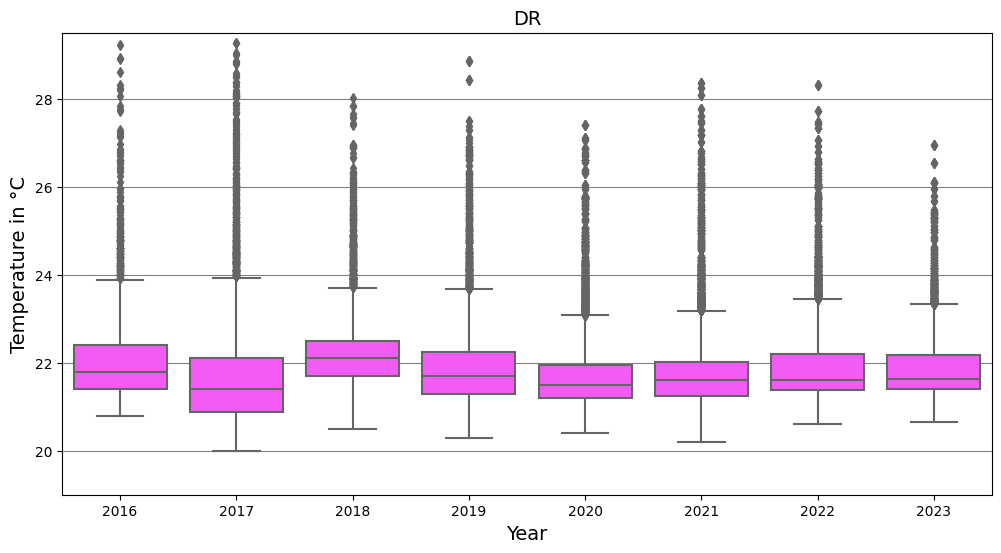

In [29]:
# Define specific room (=column)
######
cn = 'DR' #CR #################change name!!!
######
cnm = cn+'_T'
# updating our dataFrame to have only one column as rest all columns are of no use for us at the moment 
# using .to_frame() to convert pandas series into dataframe.
df[cnm] = pd.to_numeric(df[cnm])
df_short = df[cnm].to_frame()

# set date column as index
df_short = df_short.set_index(pd.DatetimeIndex(pd.to_datetime(df.iloc[:, 0])))
df_short.sort_index(inplace=True)
#df_short = df_short.asfreq(freq='10min')

df_short['Yr'] = df_short.index.year.astype('category') #building a category on the index
#print(df_short.dtypes)
print(df_short.groupby('Yr', sort=False, observed=False).mean())

# set category not only on mean per year but separate data per category to use further
grp = df_short.groupby(df_short['Yr'], sort=False, observed=False).mean()

def meanof(grp):
    y = grp[cnm].agg('mean')
    grp['Mean_Temp'] = y
    return grp

df_short_yr = df_short.groupby('Yr', observed=False).apply(meanof)

'''
###different colours
#my_pal = {"2016": "g", "2017": "b", "2018":"m"}
my_pal = {yr: "r" if yr == 2018 else "b" for yr in df_short_yr.yr.unique()}
ax = sns.boxplot(x='yr', y=cn, hue='yr', data=df_short_yr, palette=my_pal, legend=False) #(x=all_data.index, y=all_data.columns, data=all_data)
'''
###one specific colour
ax = sns.boxplot(x='Yr', y=cnm, data=df_short_yr, color='#f35cf4', dodge=False, saturation=1)     # cr='#c19632' dr='#f35cf4' #################change colors!!!
#'''
#ax.get_legend().set_visible(False)
ax.yaxis.grid(True, color ="grey")
ax.yaxis.set_ticks(np.arange(18, 29, 2))
ax.set_axisbelow(True)
ax.set_title(cn, fontsize=14)  #cnm.replace(r'_T', '')
ax.set_xlabel("Year", fontsize=14)
ax.set_ylabel("Temperature in °C", fontsize=14)
plt.ylim(19, 29.5)
plt.show()

### Step 08
### Calculate correlation matrix

For correlation examination a heat map is used to identify any visible patterns.

In [43]:
'''
include = ['datetime', 'float', 'int']
all_data_sub = df.select_dtypes(include=include)  #subset1
print(all_data_sub)
all_data_sub.info()
'''

# taking only special columns not to overload graph of correlation matrix
df_float = df.select_dtypes(include='float') #subset1
df_float = df_float.filter(regex='^(?!OA|OG).*')
##all_data_sub_f = all_data_sub_f.drop({'OG_T', 'OA_TL', 'OA_ZEITX'}, axis=1)
#all_data_sub_f = all_data.select_dtypes(include='float64')
df_float.head()
method = 'pearson' #pearson #spearman #kendall
df_float.corr(method=method) #df.corr(method, min_periods)


,BA_T,CC_T,CR_T,DR_T,HB_T,HF_T,KE_T,KW_T,LA_T,LR_T,...,CR-HF,CC-HF,KE-HF,KW-HF,SR-HF,CR-HF_n,CC-HF_n,KE-HF_n,KW-HF_n,SR-HF_n
BA_T,1.000000,0.890773,0.842616,0.481016,0.814882,0.838361,0.595226,0.658208,0.812737,0.441660,...,0.152949,0.213590,0.168916,0.180479,-0.050740,0.152949,0.213590,0.168916,0.180479,-0.050740
CC_T,0.890773,1.000000,0.952036,0.618219,0.906057,0.895874,0.756118,0.791564,0.858202,0.573881,...,0.266960,0.335788,0.339057,0.318286,-0.178768,0.266960,0.335788,0.339057,0.318286,-0.178768
CR_T,0.842616,0.952036,1.000000,0.688381,0.822220,0.868056,0.830890,0.858547,0.851898,0.702602,...,0.414158,0.287562,0.458280,0.438610,-0.037839,0.414158,0.287562,0.458280,0.438610,-0.037839
DR_T,0.481016,0.618219,0.688381,1.000000,0.516406,0.579048,0.830506,0.821193,0.565588,0.787746,...,0.319025,0.154162,0.670525,0.645943,-0.146551,0.319025,0.154162,0.670525,0.645943,-0.146551
HB_T,0.814882,0.906057,0.822220,0.516406,1.000000,0.866290,0.596877,0.618351,0.732087,0.394197,...,0.060836,0.188540,0.150537,0.098630,-0.408758,0.060836,0.188540,0.150537,0.098630,-0.408758
HF_T,0.838361,0.895874,0.868056,0.579048,0.866290,1.000000,0.661386,0.715691,0.798478,0.518229,...,-0.092374,-0.117686,0.137298,0.116553,-0.303754,-0.092374,-0.117686,0.137298,0.116553,-0.303754
KE_T,0.595226,0.756118,0.830890,0.830506,0.596877,0.661386,1.000000,0.952114,0.684066,0.855242,...,0.453890,0.287820,0.833750,0.757917,-0.052530,0.453890,0.287820,0.833750,0.757917,-0.052530
KW_T,0.658208,0.791564,0.858547,0.821193,0.618351,0.715691,0.952114,1.000000,0.755958,0.852420,...,0.409798,0.251914,0.730535,0.777073,-0.032920,0.409798,0.251914,0.730535,0.777073,-0.032920
LA_T,0.812737,0.858202,0.851898,0.565588,0.732087,0.798478,0.684066,0.755958,1.000000,0.549657,...,0.244683,0.225344,0.315600,0.355426,-0.084207,0.244683,0.225344,0.315600,0.355426,-0.084207
LR_T,0.441660,0.573881,0.702602,0.787746,0.394197,0.518229,0.855242,0.852420,0.549657,1.000000,...,0.459051,0.184004,0.747964,0.745159,0.107413,0.459051,0.184004,0.747964,0.745159,0.107413


##### Visualize relevant correlations

- First we have a look at all the correlations (matrix)
- Second we analyse which correlations a certain column has with other columns (in a descending order)

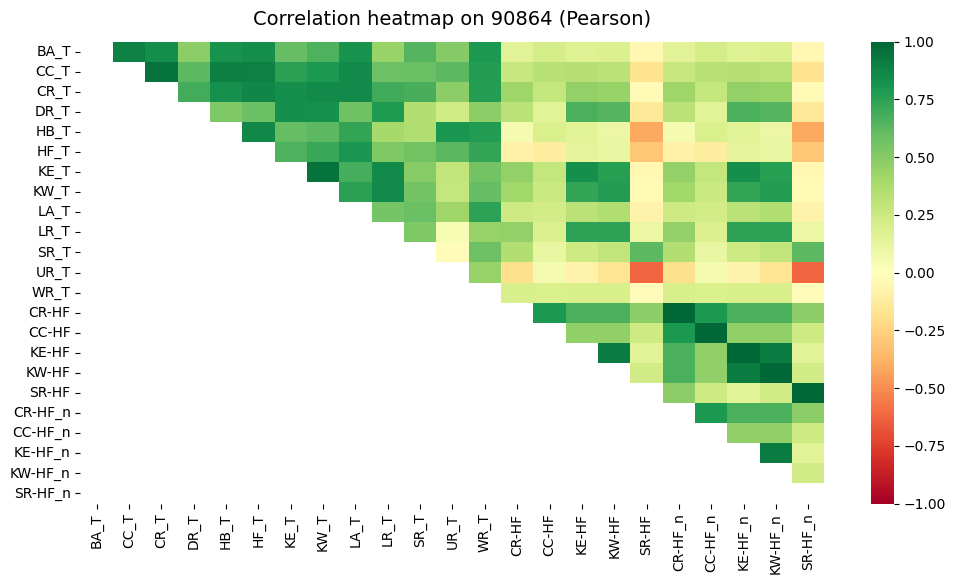

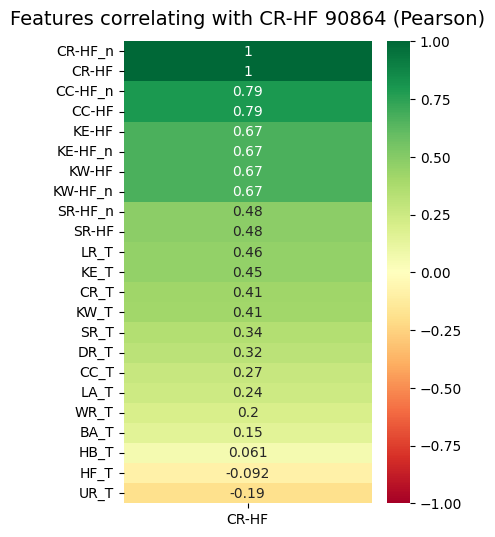

In [45]:
# Create timestamp for export
date = time.strftime("%Y-%m-%d_%H%M%S")

# Define the mask to set the values in the lower triangle to True (to hide it)
mask = np.tril(np.ones_like(df_float.corr()))  #np.triu

# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to False not to display the correlation values on the heatmap.
heatmap = sns.heatmap(df_float.corr(method=method), mask=mask, vmin=-1, vmax=1, annot=False, cmap="RdYlGn") #center=0 cmap="PiYG"

# +str(df_float.shape[0])+
heatmap.set_title('Correlation on subset "cold season" ('+method.capitalize()+')', fontdict={'fontsize':14}, pad=12);
#plt.savefig('heatmap_subset_'+str(all_data_sub.shape[0])+'_'+date+'.png', dpi=300, bbox_inches='tight')

####### Define variable (column) on which to specifically look at
diff_col = 'CR-HF'
#######

# Set other size of figure
plt.figure(2, figsize=(4, 6))
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap_single = sns.heatmap(df_float.corr(method=method)[[diff_col]].sort_values(by=diff_col, ascending=False), vmin=-1, vmax=1, annot=True, cmap="RdYlGn")
heatmap_single.set_title('Features correlating with '+diff_col+' ('+method.capitalize()+')', fontdict={'fontsize':14}, pad=12, );
#plt.savefig('heatmap_'+diff_col+'_'+date+'.png', dpi=300, bbox_inches='tight')